### Data Preparation Notebook
This notebook showcases the step-by-step preparation of the dataset with detailed explanations.

In [27]:
# Importing pandas for data manipulation
import pandas as pd

In [28]:
# Load data file
data1 = pd.read_csv('Trips_ROP_transformed_2021_Q1.csv')
data2 = pd.read_csv('Trips_ROP_transformed_2020_Q4.csv')
data2.rename(columns={
    'Bucketdate': 'Bucket',
    'EndName': 'EndName',
    'Wochentag': 'Wochentag(d)',
    'Tageszeit': 'Tageszeit(h)',
    'Schulferien': 'Schulferien',
    'Distanz': 'Distanz',
    'Count(Zaehler)': 'Count'
}, inplace=True)
data = pd.concat([data1, data2], ignore_index=True)

**Explanation**: Loading the dataset and displaying the first few rows helps to understand the structure, column names, and data types.

In [29]:
# Renaming columns for consistency and ease of use
data.rename(columns={
    'StartName': 's_name',
    'EndName': 'e_name',
    'Wochentag(d)': 'weekday',
    'Tageszeit(h)': 'daytime',
    'Schulferien': 'isHoliday',
    'Distanz': 'distance',
    'Count': 'count'
}, inplace=True)

data.head()

,Bucket,s_name,e_name,weekday,daytime,isHoliday,distance,count
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10


**Explanation**: Renaming columns makes them shorter and more intuitive, improving readability and reducing coding errors.

In [30]:
# Check for duplicate rows and remove them if present
duplicates = data.duplicated().sum()
if duplicates > 0:
    data.drop_duplicates(inplace=True)
print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 0


**Explanation**: Removing duplicate rows ensures that the data is clean and prevents skewed analysis results.

In [31]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Bucket       0
s_name       0
e_name       0
weekday      0
daytime      0
isHoliday    0
distance     0
count        0
dtype: int64


**Explanation**: Checking for missing values helps identify potential issues that need addressing (e.g., filling or dropping rows).

In [32]:
# Extracting useful details from 'start_name' and 'end_name' columns
data['startClusterName'] = data['s_name'].str.extract(r'^(.*)\(')[0]
data['startClusterZip'] = data['s_name'].str.extract(r'\((\d{5})')[0]
data['startClusterID'] = data['s_name'].str.extract(r'(\d{14})\)$')[0]

data['endClusterName'] = data['e_name'].str.extract(r'^(.*)\(')[0]
data['endClusterZip'] = data['e_name'].str.extract(r'\((\d{5})')[0]
data['endClusterID'] = data['e_name'].str.extract(r'(\d{14})\)$')[0]

**Explanation**: Extracting components from complex columns like `start_name` and `end_name` helps in detailed analysis by providing location and cluster-specific information.

In [33]:
# Transforming 'Bucket' column to 'year' and 'month'
data['year'] = pd.to_datetime(data['Bucket'], format='%Y-%m').dt.year
data['month'] = pd.to_datetime(data['Bucket'], format='%Y-%m').dt.month
data.head()


,Bucket,s_name,e_name,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15,Hunedoara,71171,03254026000002,Hunedoara,71171,03254026000007,2021,3
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10,Turda,80982,03241013050002,Turda,80982,03241013050008,2021,3
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10,Turda,80982,03241013050007,Turda,80982,03241013030001,2021,3
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15,Bran,91157,03254028001012,Bran,91157,03254028001004,2021,3
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10,Bran,91157,03254028001003,Turda,80982,03241013070001,2021,3


In [34]:
# replacer_dict = {'Keine Ferien' : 0, 
#                  'Ferien' : 1}
# data['isHoliday'] = data['isHoliday'].replace(to_replace = replacer_dict)
# data['isHoliday'].unique()
# data.head()



In [35]:
# we delete the start date and end date because we had already separated their informations into simple numerical and nominals data
try:
    data = data.drop(columns=['s_name'])
    data = data.drop(columns=['e_name'])
    data = data.drop(columns=['Bucket'])
except Exception as e:
    print('les colonnes sont inexistantes')
data.head()

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,03254026000002,Hunedoara,71171,03254026000007,2021,3
1,Mi,17,Keine Ferien,0,10,Turda,80982,03241013050002,Turda,80982,03241013050008,2021,3
2,Sa,11,Keine Ferien,3,10,Turda,80982,03241013050007,Turda,80982,03241013030001,2021,3
3,Fr,13,Keine Ferien,0,15,Bran,91157,03254028001012,Bran,91157,03254028001004,2021,3
4,Fr,18,Keine Ferien,7,10,Bran,91157,03254028001003,Turda,80982,03241013070001,2021,3


**Explanation**: Splitting the `Bucket` column into `year` and `month` enables time-based analysis.

In [36]:
# Creating the 'total' column (product of distance and count)
data['total'] = data['distance'] * data['count']

**Explanation**: The `total` column is created to calculate the total load of trips, which can be useful for aggregated analyses.

In [37]:
# Final inspection of the prepared data
data.head()

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,03254026000002,Hunedoara,71171,03254026000007,2021,3,45
1,Mi,17,Keine Ferien,0,10,Turda,80982,03241013050002,Turda,80982,03241013050008,2021,3,0
2,Sa,11,Keine Ferien,3,10,Turda,80982,03241013050007,Turda,80982,03241013030001,2021,3,30
3,Fr,13,Keine Ferien,0,15,Bran,91157,03254028001012,Bran,91157,03254028001004,2021,3,0
4,Fr,18,Keine Ferien,7,10,Bran,91157,03254028001003,Turda,80982,03241013070001,2021,3,70


In [38]:
data['weekday'].unique()
# Remplacement des variations des jours de la semaine
normalization_mapping = {
    'Di': 'Di',
    'Mi': 'Mi',
    'Sa': 'Sa',
    'Fr': 'Fr',
    'So/Fe': 'Sun',
    'Mo': 'Mo',
    'Do': 'Do',
    'Donn': 'Do',
    'Mon': 'Mo',
    'Sam': 'Sa'
}

# Appliquer la normalisation
data['weekday'] = data['weekday'].replace(normalization_mapping)

# Vérifier les nouvelles valeurs uniques
print(data['weekday'].unique())
# data['isHoliday'].unique()


['Di' 'Mi' 'Sa' 'Fr' 'Sun' 'Mo' 'Do']


In [39]:
# Assume data is your DataFrame and “total” the column of interest

# Outlier detection with IQR (interquartile range)
q1 = data['total'].quantile(0.25)  # first quartil
q3 = data['total'].quantile(0.75)  # third quartile
iqr = q3 - q1  # Interquartile range

# Defining outlier limits
lower_bound = q1 - 1.5 * iqr  # Limite inférieure
upper_bound = q3 + 1.5 * iqr  # Limite supérieure

# Filter data to remove outliers
data_without_outliers = data[(data['total'] >= lower_bound) & (data['total'] <= upper_bound)]

# Display dimensions before and after filtering
print(f"Dimensions avant filtrage : {data.shape}")
print(f"Dimensions après filtrage : {data_without_outliers.shape}")

Dimensions avant filtrage : (277027, 14)
Dimensions après filtrage : (265486, 14)


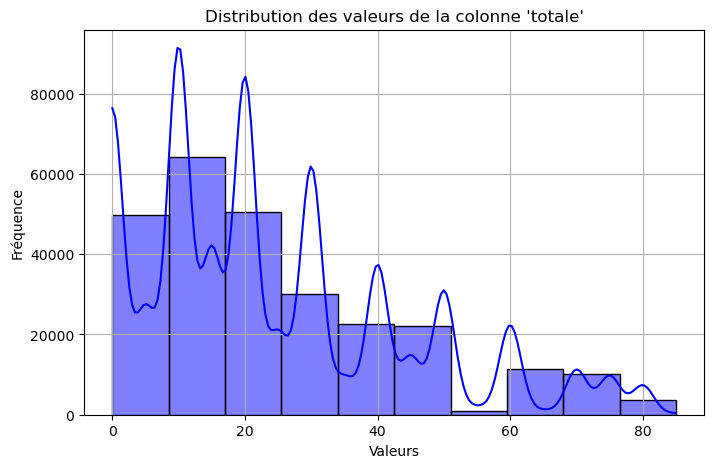

{'Minimum': 0,
 'Maximum': 85,
 'Moyenne': 24.406861378754435,
 'Médiane': 20.0,
 'Écart-type': 20.145682801868254,
 'Variance': 405.8485355534903,
 'Étendue interquartile (IQR)': 25.0}

In [40]:
# space
import matplotlib.pyplot as plt
import seaborn as sns

data = data_without_outliers
# Calcul des paramètres de dispersion
minimum = data['total'].min()
maximum = data['total'].max()
mean = data['total'].mean()
median = data['total'].median()
std_dev = data['total'].std()  # Écart-type
variance = data['total'].var()  # Variance
iqr = data['total'].quantile(0.75) - data['total'].quantile(0.25)  # Étendue interquartile

# Affichage des paramètres
dispersion_params = {
    "Minimum": minimum,
    "Maximum": maximum,
    "Moyenne": mean,
    "Médiane": median,
    "Écart-type": std_dev,
    "Variance": variance,
    "Étendue interquartile (IQR)": iqr
}

# Visualisation de la distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['total'], kde=True, color='blue', bins=10, edgecolor='black')
plt.title("Distribution des valeurs de la colonne 'totale'")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

dispersion_params

In [41]:
# Saving the prepared data
data.to_csv('prepared_data.csv', index=False)


The aim of this exercise was to prepare and transform a dataset in such a way as to make it ready for in-depth analysis. Here's why this exercise is important:
Data Cleaning: Removing duplicates and dealing with missing values ensures that the dataset is clean and reliable, reducing bias in the analysis.Data Enrichment: Extracting sub-parts of complex columns, such as cluster names and zip codes, enables more targeted analyses (by region, by cluster, etc.).